<a href="https://colab.research.google.com/github/zoya-riyan-hussain/Tree-Species-Classification/blob/master/Tree_Classifcation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("viditgandhi/tree-species-identification-dataset")

print("Path to dataset files:", path)

100%|██████████| 72.8M/72.8M [00:01<00:00, 73.8MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/viditgandhi/tree-species-identification-dataset/versions/1


In [ ]:
# The previous cell already downloaded the dataset using kagglehub
# We can use the path obtained from there directly.

# Assuming the path variable from the previous cell is still available
# If not, you might need to re-run the previous cell or get the path again.
dataset_path = path # Using the 'path' variable from the kagglehub download

print(f"Dataset is available at: {dataset_path}")

# You can now use the 'dataset_path' variable to access the dataset files.
# For example, to list the contents of the dataset directory:
import os
print("\nContents of the dataset directory:")
print(os.listdir(dataset_path))

Dataset is available at: /root/.cache/kagglehub/datasets/viditgandhi/tree-species-identification-dataset/versions/1

Contents of the dataset directory:
['Tree_Species_Dataset']


In [ ]:
import os

# Use the dataset_path variable from the previous cell
# The dataset is located within the downloaded directory
repo_path = os.path.join(dataset_path, "Tree_Species_Dataset")
print("Contents:", os.listdir(repo_path))

Contents: ['motichanoti', 'jamun', 'other', 'vad', 'champa', 'saptaparni', 'kesudo', 'babul', 'cactus', '.git', 'neem', 'gulmohor', 'bamboo', 'kanchan', 'banyan', 'sitafal', 'nilgiri', 'sonmahor', 'amla', 'bili', 'simlo', 'gunda', 'khajur', 'sugarcane', 'pilikaren', 'garmalo', 'asopalav', 'coconut', 'shirish', 'mango', 'pipal']


In [ ]:
class_dirs = os.listdir(repo_path)
print(f"Number of classes: {len(class_dirs)}")


Number of classes: 31


In [ ]:
import glob

image_paths = []
labels = []

for class_name in os.listdir(repo_path):
    class_folder = os.path.join(repo_path, class_name)
    if os.path.isdir(class_folder):
        for img_file in os.listdir(class_folder):
            image_paths.append(os.path.join(class_folder, img_file))
            labels.append(class_name)

print(f"Total images: {len(image_paths)}")

Total images: 1605


In [ ]:
import pandas as pd

class_counts = {cls: len(os.listdir(os.path.join(repo_path, cls))) for cls in class_dirs}
class_counts_df = pd.DataFrame.from_dict(class_counts, orient='index', columns=['Image Count'])
print(class_counts_df.sort_values('Image Count', ascending=False).head())
print("shape: ",class_counts_df.shape)

             Image Count
other                150
motichanoti           50
jamun                 50
vad                   50
champa                50
shape:  (31, 1)


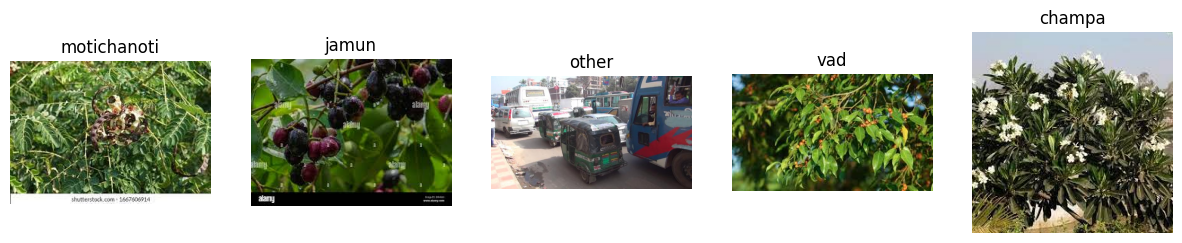

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

def show_sample_images(repo_path, class_dirs, n=5):
    plt.figure(figsize=(15, 10))
    for i, class_dir in enumerate(class_dirs[:n]):
        img_path = os.path.join(repo_path, class_dir, os.listdir(os.path.join(repo_path, class_dir))[0])
        img = Image.open(img_path)
        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.title(class_dir)
        plt.axis('off')
    plt.show()

show_sample_images(repo_path, class_dirs)

In [ ]:
import os
from PIL import Image
import pandas as pd

image_shapes = []

# Redefine class_dirs here, excluding the .git directory
class_dirs = [d for d in os.listdir(repo_path) if os.path.isdir(os.path.join(repo_path, d)) and d != '.git']


for class_dir in class_dirs:
    for img_file in os.listdir(os.path.join(repo_path, class_dir)):
        img_path = os.path.join(repo_path, class_dir, img_file)
        try:
            img = Image.open(img_path)
            image_shapes.append(img.size)
        except UnidentifiedImageError:
            # Optionally, print a message or log the error for non-image files
            print(f"Skipping non-image file: {img_path}")


# DataFrame and Summary
shapes_df = pd.DataFrame(image_shapes, columns=["Width", "Height"])
shapes_df.head()

,Width,Height
0,266,190
1,259,195
2,225,225
3,194,259
4,275,183


In [ ]:
print(shapes_df.describe())

             Width       Height
count  1600.000000  1600.000000
mean    312.623125   269.821875
std     296.220501   278.014229
min     141.000000   128.000000
25%     225.000000   183.000000
50%     259.000000   200.000000
75%     275.000000   259.000000
max    4000.000000  4032.000000


In [ ]:
import hashlib
from collections import defaultdict

hashes = defaultdict(list)

for class_dir in class_dirs:
    for img_file in os.listdir(os.path.join(repo_path, class_dir)):
        img_path = os.path.join(repo_path, class_dir, img_file)
        with open(img_path, 'rb') as f:
            file_hash = hashlib.md5(f.read()).hexdigest()
            hashes[file_hash].append(img_path)

# Filter duplicates
duplicates = {h: files for h, files in hashes.items() if len(files) > 1}
print("Duplicate image sets found:", len(duplicates))

Duplicate image sets found: 82


In [ ]:
corrupt_images = []

for class_dir in class_dirs:
    for img_file in os.listdir(os.path.join(repo_path, class_dir)):
        img_path = os.path.join(repo_path, class_dir, img_file)
        try:
            img = Image.open(img_path)
            img.verify()
        except Exception as e:
            corrupt_images.append(img_path)

print("Corrupted images:", len(corrupt_images))

Corrupted images: 0


Duplicate set 1:


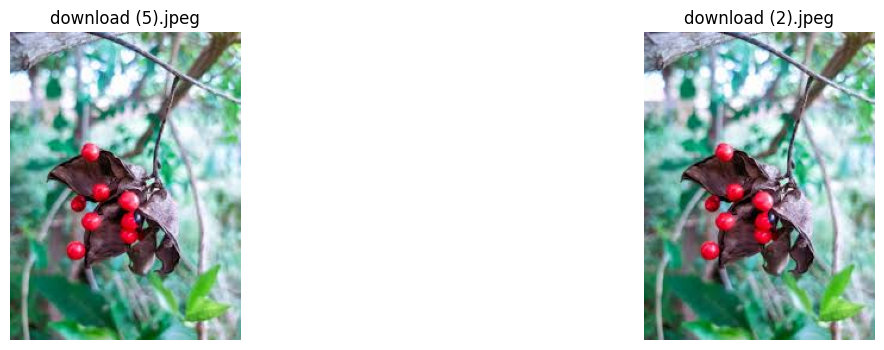

Duplicate set 2:


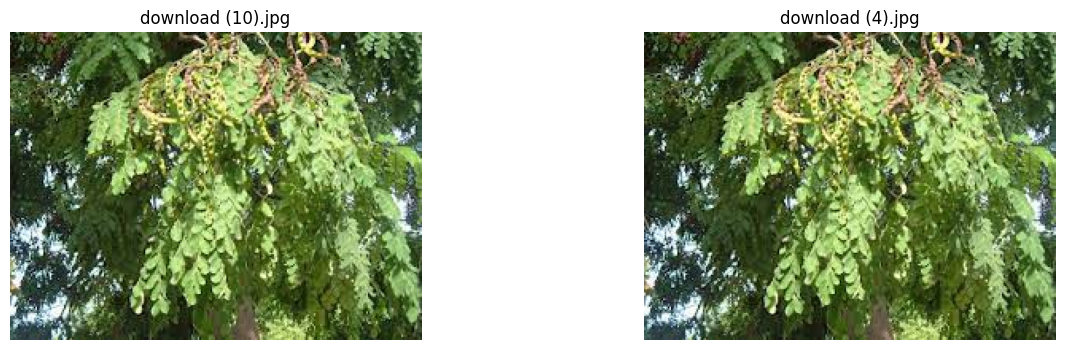

Duplicate set 3:


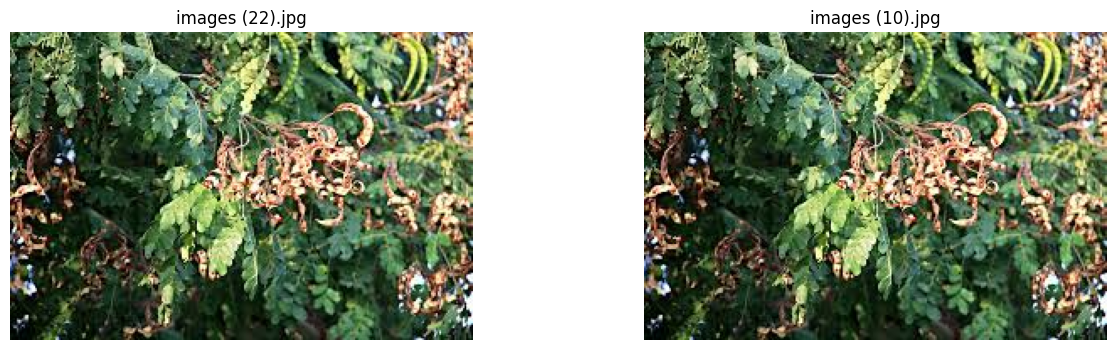

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

def show_duplicate_sets(duplicates, sets_to_display=3):
    shown = 0
    for hash_val, dup_paths in duplicates.items():
        if shown >= sets_to_display:
            break
        print(f"Duplicate set {shown + 1}:")
        plt.figure(figsize=(15, 4))
        for i, img_path in enumerate(dup_paths):
            try:
                img = Image.open(img_path)
                plt.subplot(1, len(dup_paths), i+1)
                plt.imshow(img)
                plt.title(os.path.basename(img_path))
                plt.axis('off')
            except:
                continue
        plt.show()
        shown += 1

show_duplicate_sets(duplicates, sets_to_display=3)

In [ ]:
import os

removed_count = 0

for dup_list in duplicates.values():
    # Keep the first, delete rest
    for img_path in dup_list[1:]:
        try:
            os.remove(img_path)
            removed_count += 1
        except Exception as e:
            print(f"Error deleting {img_path}: {e}")

print(f"✅ Removed {removed_count} duplicate images.")

✅ Removed 86 duplicate images.


In [ ]:
hashes = defaultdict(list)

for class_dir in class_dirs:
    for img_file in os.listdir(os.path.join(repo_path, class_dir)):
        img_path = os.path.join(repo_path, class_dir, img_file)
        with open(img_path, 'rb') as f:
            file_hash = hashlib.md5(f.read()).hexdigest()
            hashes[file_hash].append(img_path)

duplicates = {h: files for h, files in hashes.items() if len(files) > 1}
print("🔁 Duplicates remaining:", len(duplicates))

🔁 Duplicates remaining: 0


In [ ]:
from PIL import Image
import pandas as pd

# Gather image info
image_info = []

for class_dir in class_dirs:
    class_path = os.path.join(repo_path, class_dir)
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)
        try:
            with Image.open(img_path) as img:
                width, height = img.size
                image_info.append({
                    'path': img_path,
                    'width': width,
                    'height': height,
                    'class': class_dir
                })
        except:
            continue

df_sizes = pd.DataFrame(image_info)

# Define thresholds
small_imgs = df_sizes[(df_sizes['width'] < 150) | (df_sizes['height'] < 150)]
large_imgs = df_sizes[(df_sizes['width'] > 1000) | (df_sizes['height'] > 2000)]

print(f"🔻 Very small images: {len(small_imgs)}")
print(f"🔺 Very large images: {len(large_imgs)}")

🔻 Very small images: 20
🔺 Very large images: 40


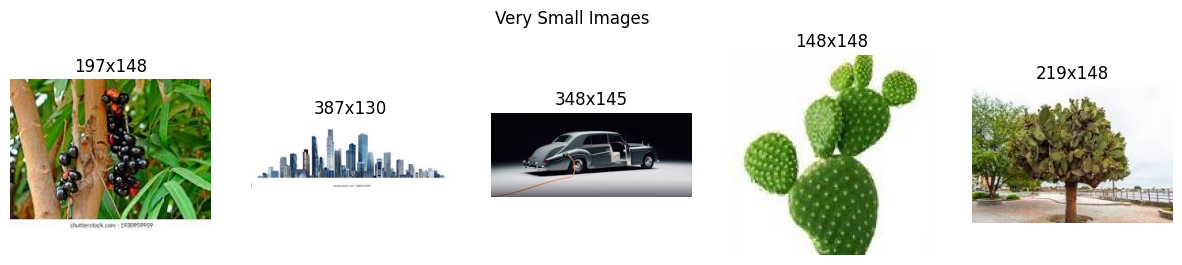

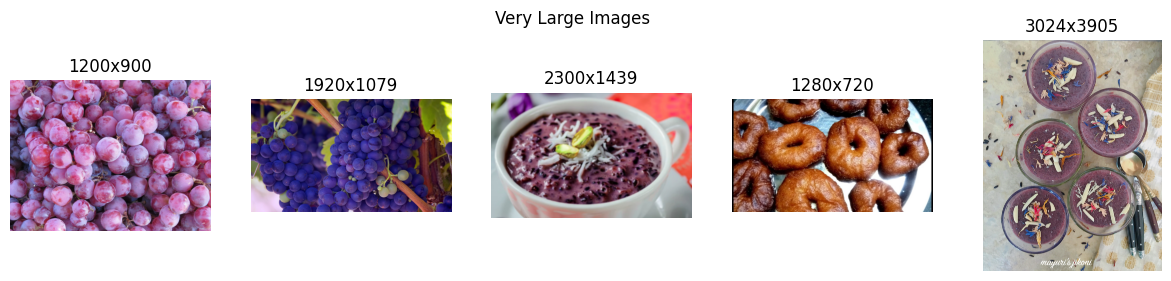

In [ ]:
def show_images(df_subset, title, n=5):
    plt.figure(figsize=(15, 3))
    for i, (_, row) in enumerate(df_subset.head(n).iterrows()):
        img = Image.open(row['path'])
        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.title(f"{row['width']}x{row['height']}")
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

show_images(small_imgs, "Very Small Images")
show_images(large_imgs, "Very Large Images")


In [ ]:
import os

# Combine both sets
outliers = pd.concat([small_imgs, large_imgs])

# Remove them
removed_count = 0
for path in outliers['path']:
    try:
        os.remove(path)
        removed_count += 1
    except Exception as e:
        print(f"Failed to remove {path}: {e}")

print(f"🗑️ Removed {removed_count} outlier images (small + large).")


🗑️ Removed 60 outlier images (small + large).


In [ ]:
image_info = []

for class_dir in class_dirs:
    class_path = os.path.join(repo_path, class_dir)
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)
        try:
            with Image.open(img_path) as img:
                width, height = img.size
                image_info.append({
                    'path': img_path,
                    'width': width,
                    'height': height,
                    'class': class_dir
                })
        except:
            continue

df_sizes = pd.DataFrame(image_info)
print(df_sizes[['width', 'height']].describe())

             width       height
count  1454.000000  1454.000000
mean    275.872765   239.044704
std     117.507849   117.197342
min     150.000000   150.000000
25%     225.000000   183.000000
50%     259.000000   198.000000
75%     275.000000   256.000000
max    1000.000000  1247.000000


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define parameters
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32

# Augmentation and rescaling
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True
)

train_gen = datagen.flow_from_directory(
    repo_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    repo_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

Found 1177 images belonging to 31 classes.
Found 277 images belonging to 31 classes.


In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

base_model = EfficientNetB0(include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3), weights='imagenet')
base_model.trainable = False  # Freeze base model

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(train_gen.num_classes, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 31)             │         3,999 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,217,538 (16.09 MB)

 Trainable params: 167,967 (656.12 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [ ]:
EPOCHS = 10

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 65s 1s/step - accuracy: 0.0485 - loss: 3.4864 - val_accuracy: 0.0903 - val_loss: 3.4060
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 16s 441ms/step - accuracy: 0.0773 - loss: 3.4337 - val_accuracy: 0.0903 - val_loss: 3.3902
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 21s 446ms/step - accuracy: 0.0853 - loss: 3.3961 - val_accuracy: 0.0903 - val_loss: 3.3892
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 17s 467ms/step - accuracy: 0.0827 - loss: 3.4078 - val_accuracy: 0.0903 - val_loss: 3.3867
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 17s 472ms/step - accuracy: 0.0900 - loss: 3.3989 - val_accuracy: 0.0903 - val_loss: 3.3781
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 16s 446ms/step - accuracy: 0.0791 - loss: 3.4094 - val_accuracy: 0.0903 - val_loss: 3.3801
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 19s 506ms/step - accuracy: 0.0846 - loss: 3.4081 - val_accuracy: 0.0903 - val_loss: 3.3844
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 16s 440ms/step - accuracy: 0.0915 - loss: 3.3856 - val_accurac

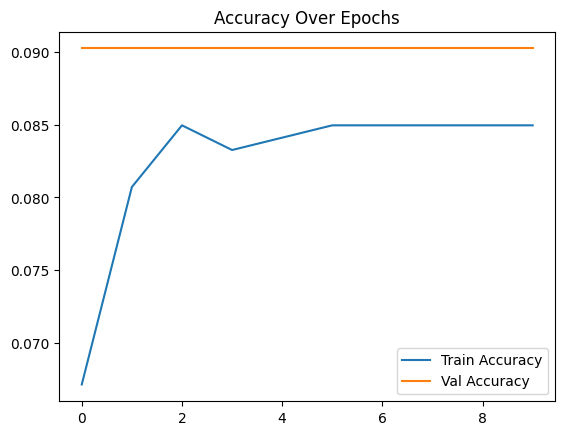

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Accuracy Over Epochs")
plt.show()

# Save model
model.save("tree_species_model.h5")

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image properties
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32

# Data generators
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = datagen.flow_from_directory(
    repo_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    repo_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

num_classes = train_generator.num_classes

# Build a basic CNN model
model_cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model_cnn.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Train the model
EPOCHS = 10
history_cnn = model_cnn.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator
)

# Save the model
model_cnn.save('basic_cnn_tree_species.h5')
print("✅ Basic CNN model saved as 'basic_cnn_tree_species.h5'")

Found 1177 images belonging to 31 classes.
Found 277 images belonging to 31 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 30s 636ms/step - accuracy: 0.0384 - loss: 4.1577 - val_accuracy: 0.1191 - val_loss: 3.3814
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 17s 450ms/step - accuracy: 0.1218 - loss: 3.3243 - val_accuracy: 0.1155 - val_loss: 3.0859
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 17s 458ms/step - accuracy: 0.1292 - loss: 3.1393 - val_accuracy: 0.1227 - val_loss: 3.0023
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 17s 467ms/step - accuracy: 0.1533 - loss: 3.0362 - val_accuracy: 0.1516 - val_loss: 2.8962
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 19s 511ms/step - accuracy: 0.1462 - loss: 2.9859 - val_accuracy: 0.1588 - val_loss: 2.8639
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 17s 468ms/step - accuracy: 0.1659 - loss: 2.9212 - val_accuracy: 0.1805 - val_loss: 2.8623
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 16s 444ms/step - accuracy: 0.1785 - loss: 2.8056 - val_accuracy: 0.1841 - val_loss: 2.8229
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 20s 532ms/step - accuracy: 0.1710 - loss: 2.8180 - val_accu

✅ Basic CNN model saved as 'basic_cnn_tree_species.h5'


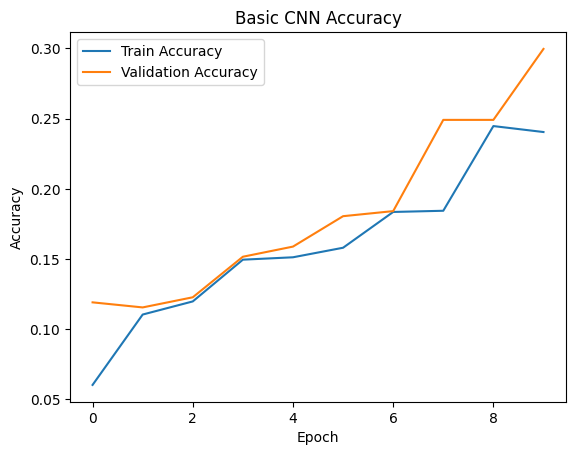

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history_cnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.title("Basic CNN Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.25), # Added dropout

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.25), # Added dropout

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.25), # Added dropout

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

# Reduced learning rate
model.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Increased epochs
history_improved_cnn = model.fit(train_generator, validation_data=val_generator, epochs=50)

model.save("improved_cnn_model.h5")
print("✅ Improved CNN model saved as 'improved_cnn_model.h5'")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 26s 549ms/step - accuracy: 0.0426 - loss: 4.8841 - val_accuracy: 0.0325 - val_loss: 3.6726
Epoch 2/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 17s 470ms/step - accuracy: 0.1225 - loss: 3.2548 - val_accuracy: 0.0325 - val_loss: 4.6895
Epoch 3/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 17s 455ms/step - accuracy: 0.1389 - loss: 3.0531 - val_accuracy: 0.0325 - val_loss: 5.5916
Epoch 4/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 19s 505ms/step - accuracy: 0.1864 - loss: 3.0465 - val_accuracy: 0.0289 - val_loss: 6.0647
Epoch 5/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 18s 450ms/step - accuracy: 0.1938 - loss: 2.9129 - val_accuracy: 0.0325 - val_loss: 6.3091
Epoch 6/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 17s 455ms/step - accuracy: 0.1789 - loss: 2.8758 - val_accuracy: 0.0325 - val_loss: 6.5193
Epoch 7/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 17s 461ms/step - accuracy: 0.2056 - loss: 2.8130 - val_accuracy: 0.0361 - val_loss: 6.1991
Epoch 8/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 17s 451ms/step - accuracy: 0.2649 - loss: 2.6671 - val_accu

✅ Improved CNN model saved as 'improved_cnn_model.h5'


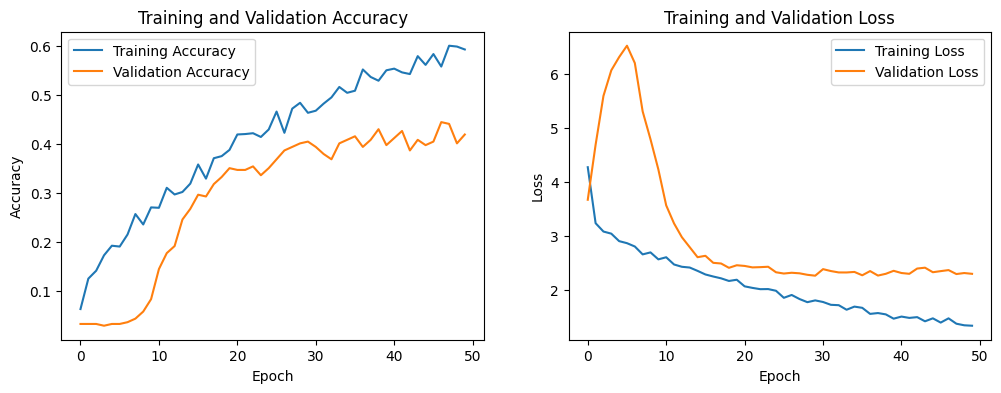

In [ ]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    """Plots the training and validation accuracy and loss."""
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, label='Training Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Assuming the history object from the last training run is available as history_improved_cnn
if 'history_improved_cnn' in globals():
    plot_training_history(history_improved_cnn)
else:
    print("Training history not found. Please run the training cell first.")